# fbb scheleton notebook for PUI2016 HW6

In [1]:
from __future__ import print_function, division
import geopandas as gp
import pandas as pd
import pylab as pl
import matplotlib as plt

import os
import json

#s = json.load( open(os.getenv('PUI2016')+'/fbb_matplotlibrc.json') )
#pl.rcParams.update(s)
if os.getenv("PUIDATA") is None:
    print ("$PUIDATA to point to set PUIdata dir")

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
os.getenv("PUIDATA")

'/home/cusp/lx565/PUIdata'

In [3]:
#download, and move data to PUIDATA, and read data in 
path = "https://data.cityofnewyork.us/resource/m46j-75iy.json"
path_pluto = "https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/mn_mappluto_16v1.zip"

#downloading
os.system("curl -O " + path)
os.system("curl -O " + path_pluto)
#move data to puidata
os.system("mv " + "m46j-75iy.json " + os.getenv("PUIDATA"))
os.system("mv " + "mn_mappluto_16v1.zip " + os.getenv("PUIDATA"))

os.system("unzip " + os.getenv("PUIDATA") + "/" +"mn_mappluto_16v1.zip -d " + os.getenv("PUIDATA"))


          
nrg = pd.read_json(os.getenv("PUIDATA") + "/" +"m46j-75iy.json")


    
    

In [4]:
bsize = gp.read_file(os.getenv("PUIDATA") + "/" + "MNMapPLUTO.shp")
bsize.columns

Index([    u'APPBBL',    u'APPDate',    u'Address', u'AllZoning1',
       u'AllZoning2', u'AreaSource', u'AssessLand',  u'AssessTot',
              u'BBL',   u'BldgArea',  u'BldgClass',  u'BldgDepth',
        u'BldgFront',      u'Block',   u'BoroCode',    u'Borough',
         u'BsmtCode',  u'BuiltCode',   u'BuiltFAR',     u'CB2010',
               u'CD',     u'CT2010',    u'ComArea',    u'CommFAR',
          u'CondoNo',    u'Council',  u'EDesigNum',  u'Easements',
       u'ExemptLand',  u'ExemptTot',        u'Ext',   u'FacilFAR',
       u'FactryArea',   u'FireComp', u'GarageArea', u'HealthArea',
         u'HistDist', u'IrrLotCode',    u'LandUse',   u'Landmark',
              u'Lot',    u'LotArea',   u'LotDepth',   u'LotFront',
          u'LotType',  u'LtdHeight', u'MAPPLUTO_F',   u'NumBldgs',
        u'NumFloors', u'OfficeArea',  u'OtherArea',   u'Overlay1',
         u'Overlay2',  u'OwnerName',  u'OwnerType', u'PLUTOMapID',
       u'PolicePrct',   u'ProxCode',    u'ResArea',   u'ResidF

In [5]:
nrg.columns

Index([u'automatic_water_benchmarking_eligible', u'bbls_co_reported',
       u'borough', u'co_reported_bbl_status', u'direct_ghg_emissions_mtco2e',
       u'dof_benchmarking_submission_status', u'dof_number_of_buildings',
       u'dof_property_floor_area_buildngs_and_parking_ft2',
       u'energy_star_score', u'indirect_ghg_emissions_mtco2e',
       u'municipally_supplied_potable_water_indoor_intensity_gal_ft',
       u'nyc_borough_block_and_lot_bbl',
       u'primary_property_type_self_selected', u'record_number',
       u'reported_nyc_building_identificaiton_numbers_bins',
       u'reported_property_floor_area_building_s_ft', u'reported_water_method',
       u'site_eui_kbtu_ft2', u'source_eui_kbtu_ft2', u'street_name',
       u'street_number', u'total_ghg_emissions_mtco2e',
       u'weather_normalized_site_eui_kbtu_ft2',
       u'weather_normalized_source_eui_kbtu_ft2', u'zip_code'],
      dtype='object')

In [6]:
# make sure you clean up your data and throw away columns you do not need!

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f992c53d490>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f99318b1850>]], dtype=object)

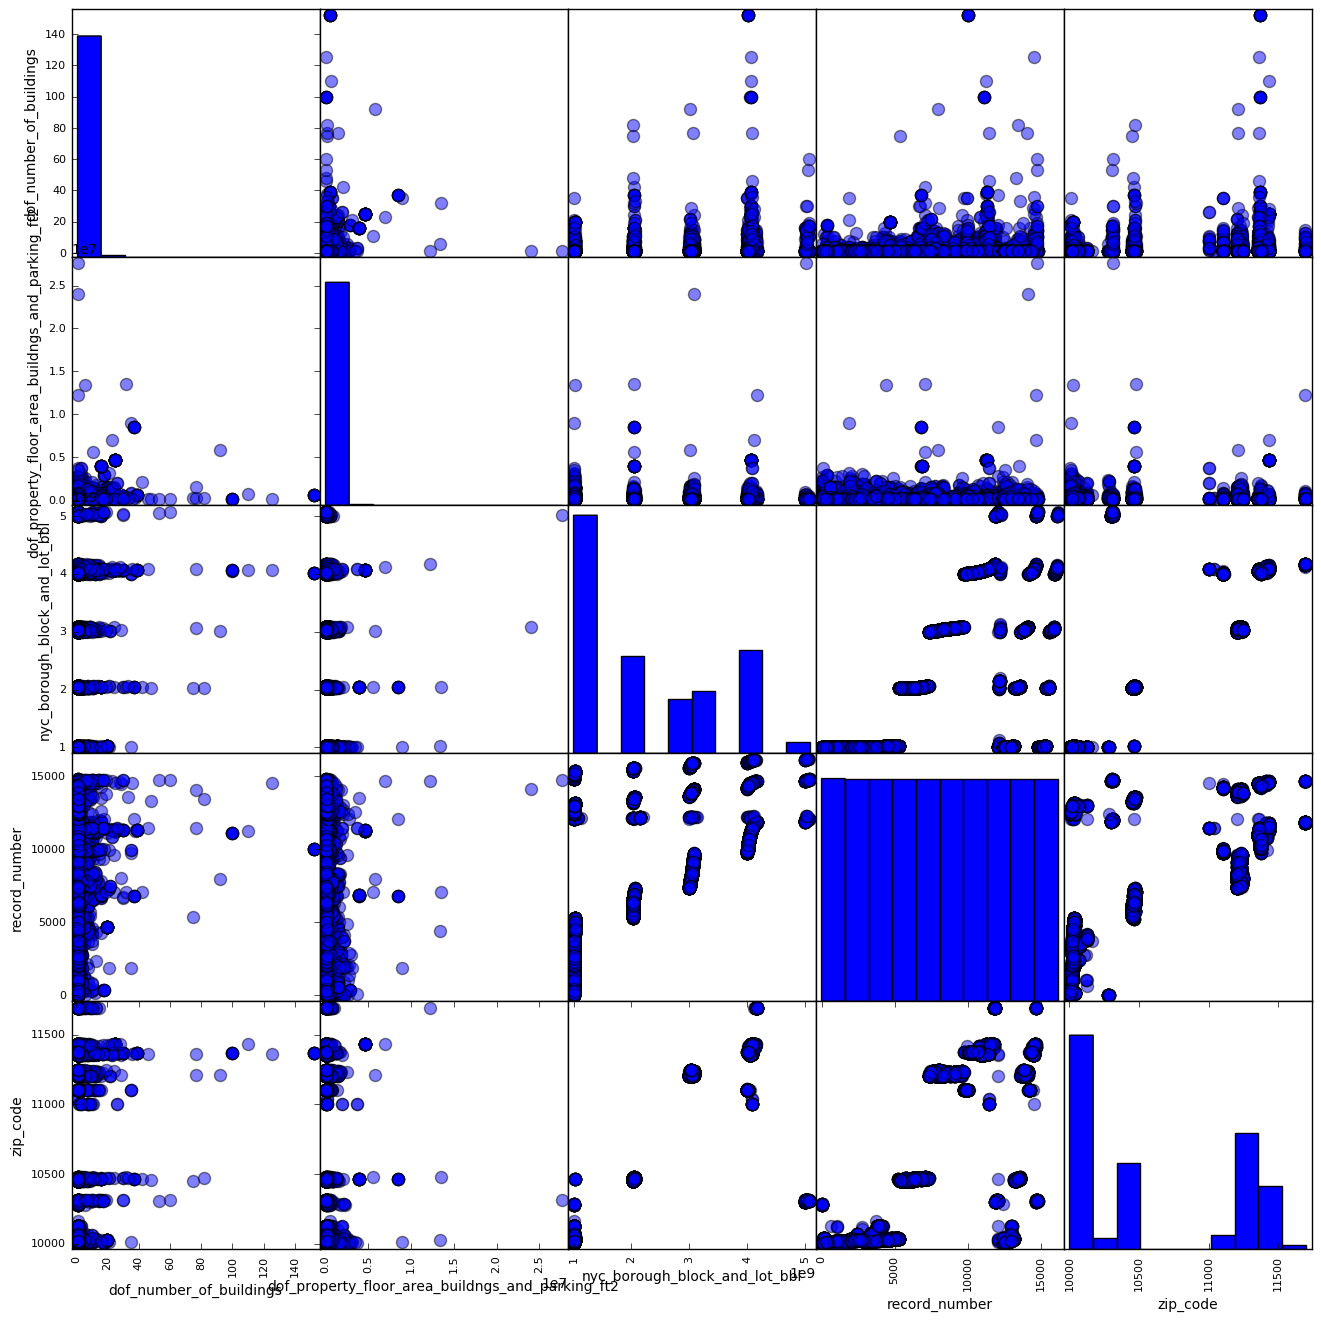

In [7]:
#try make a scatter plot of nrg. Few columns will plot
from pandas.tools.plotting import scatter_matrix
scatter_matrix (nrg, s=300, figsize=(16, 16))

Figure 1: scatter matrix of all numerical values in the files.

This kind of plot shows correlations between variables, but it will also show me what can and cannot be plotted trivially in my dataset. Here only a few columns can be plotted: those that contain only numbers (and possibly NaN's), but most columns contain rows that cannot be converted to float (e.g. entries like 'See Primary BBL' in several rows for the energy dataframe 'Site EUI(kBtu/ft2) ' column) , so Pandas refuses to plot them, cause it does not know what to do with those entries. The columns I am interested in are in fact u'Site EUI(kBtu/ft2)' which is a measure of the energy consumed PER SQ FOOT by a building, and then the building area: for eg. u'Reported Property Floor Area (Building(s)) (ft²)'. Neither gets plotted: i need to remove all values that cannot conver to float in order to use the columns and convert them to float arrays and do math with them.
Below I created a function that returns True if what is passed as argument can be converted to a float, and False otherwise. I do it with the Try/Except structure. it is a very useful python functionality that you should look into.
This has to be done entry by entry: if you give it a series you get error "cannot convert the series to..."
However you can pass it a whole array by using it in conjunction with np.vectorize (look up the syntax!) which will implement a for loop for you under the hood to pass the series entry by entry to your function.

In [8]:
def canconvert(mydata):
        try :
            float(mydata)
            return True
        except ValueError:
            return False


In [9]:
g = np.vectorize(canconvert, otypes=[np.ndarray])
tpm = g(nrg['site_eui_kbtu_ft2'])
tpm

array([True, True, True, ..., True, True, True], dtype=object)

In [10]:
nrg["True or False"] = tpm
nrg.head()

,automatic_water_benchmarking_eligible,bbls_co_reported,borough,co_reported_bbl_status,direct_ghg_emissions_mtco2e,dof_benchmarking_submission_status,dof_number_of_buildings,dof_property_floor_area_buildngs_and_parking_ft2,energy_star_score,indirect_ghg_emissions_mtco2e,...,reported_water_method,site_eui_kbtu_ft2,source_eui_kbtu_ft2,street_name,street_number,total_ghg_emissions_mtco2e,weather_normalized_site_eui_kbtu_ft2,weather_normalized_source_eui_kbtu_ft2,zip_code,True or False
0,N/A,1000410001,Manhattan,NaN,NaN,BBL not valid,NaN,NaN,Not Available,NaN,...,N/A,NaN,NaN,NaN,NaN,NaN,Not Available,Not Available,NaN,True
1,Yes,NaN,Queens,NaN,NaN,No Submission Matched to BBL,1.0,82730.0,NaN,NaN,...,None,NaN,NaN,108 STREET,63-10,NaN,NaN,NaN,11375.0,True
2,N/A,2027620097,Bronx,NaN,NaN,BBL not valid,NaN,NaN,Not Available,NaN,...,N/A,NaN,NaN,NaN,NaN,NaN,Not Available,Not Available,NaN,True
3,No,NaN,Manhattan,NaN,NaN,No Submission Matched to BBL,1.0,440360.0,NaN,NaN,...,None,NaN,NaN,11 AVENUE,201,NaN,NaN,NaN,10001.0,True
4,N/A,2048300034,Bronx,NaN,NaN,Not on Covered Buildings List,NaN,NaN,Not Available,NaN,...,None,NaN,NaN,NaN,NaN,NaN,Not Available,Not Available,NaN,True


In [11]:
nrg = nrg[nrg['True or False'] == True]
len(nrg) #throw away all the "false" rows 

15513


Now for every column I care about I can create an array, call it for eg. indx, of True and False (a Boolean array) that i can use as an index to pick entries that I want to use from my arrays of interest. 

I can replace the entries that failed to be converted to 'NaN'
(because my function return Trues when I can convert and False otherwise i actuallly want the complementary array: ~indx) 

In [12]:
##check that your conversion worked: e.g.
nrg['site_eui_kbtu_ft2'].astype(float)
#[...] check all columns you care about in both datasets. 
#Nan's are ok, but you must not get an error when you try the conversion
#the Pluto data is much better at not using spurious entries for numerical value columns. 

#but check you can use the columns you want
bsize.BBL.astype(float)
#this should not return an error
#notice i can use the attribute notation to refer to columns in bsize, 
#cause the column names do not have spaces!


0        1.015450e+09
1        1.007238e+09
2        1.016800e+09
3        1.013850e+09
4        1.011970e+09
5        1.002360e+09
6        1.008370e+09
7        1.001960e+09
8        1.022240e+09
9        1.011270e+09
10       1.011650e+09
11       1.021740e+09
12       1.009120e+09
13       1.007920e+09
14       1.012110e+09
15       1.011240e+09
16       1.009040e+09
17       1.010090e+09
18       1.020620e+09
19       1.020630e+09
20       1.008940e+09
21       1.005728e+09
22       1.004400e+09
23       1.019470e+09
24       1.008830e+09
25       1.020810e+09
26       1.021610e+09
27       1.008570e+09
28       1.008830e+09
29       1.020410e+09
             ...     
42667    1.014738e+09
42668    1.006208e+09
42669    1.007218e+09
42670    1.013428e+09
42671    1.019448e+09
42672    1.017298e+09
42673    1.018488e+09
42674    1.005008e+09
42675    1.020448e+09
42676    1.004518e+09
42677    1.020958e+09
42678    1.007688e+09
42679    1.008498e+09
42680    1.017298e+09
42681    1

In [13]:
#example
indx = (np.vectorize(canconvert)(nrg['site_eui_kbtu_ft2']))
print ("invalid entries changed to NaN %d"%sum(indx))
t2= nrg['site_eui_kbtu_ft2'][~indx]
t2 = float('NaN')
#do it for however many columns you need

invalid entries changed to NaN 15513


# MERGE THE DATASET
TO DO IT WE NEED A COMMON COLUMN: the building id BBL However the name of this variable (column) in the Energy dataset is 'NYC Borough, Block, and Lot (BBL)'. create a column 'BBL' in the nrg dataset to pass it to the 'on' keyword argument of the merge pandas method: pd.merge(..... on=['BBL']) will use the common column 'BBL' to join the information from the 2 datasets for each BBL value (check out the complete syntax!)

In [14]:
nrg["site_eui_kbtu_ft2"] = nrg["site_eui_kbtu_ft2"].convert_objects(convert_numeric=True)

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


In [15]:
nrg["site_eui_kbtu_ft2"] = pd.to_numeric(nrg["site_eui_kbtu_ft2"], errors="coerce")
nrg["reported_property_floor_area_building_s_ft"] = pd.to_numeric(nrg["reported_property_floor_area_building_s_ft"]
                                                                        , errors="coerce")


In [16]:
# prepare your BBL columns
nrg.rename(columns={ "nyc_borough_block_and_lot_bbl" : "BBL"}, inplace = True)

nrg.rename(columns ={'reported_property_floor_area_building_s_ft': "area", 'site_eui_kbtu_ft2' : "nrgperarea"}, 
                  inplace = True)
#merge
bblnrgdata = pd.merge(nrg, bsize, on='BBL')

# Now the scatter matrix plot should show more columns.
#scatter_matrix (bblnrgdata, s=30, figsize=(16, 16))

In [17]:
bblnrgdata[['nrgperarea',"area"]] = bblnrgdata[['nrgperarea',"area"]].applymap(lambda x : float(x))

In [18]:
bblnrgdata["totnrg"] = nrg['area'].multiply(nrg['nrgperarea'],axis = "index")
bblnrgdata = bblnrgdata[~bblnrgdata.totnrg.isnull()]

once you have the dataframe with all the info you want, you want to plot Energy vs Number of Units in the Building. Remember: **Energy TOTAL, not per sq ft...** Here you can choose what you think makes more sense for the number of units: all units, residential units... 

**Make a  scatter plot first of Energy vs Units. It will look really bad be cause all the datapoints are at very low Unit numbers while the Unit number range actually goes up to 8000. **


Make a second plot that zooms into the region where most points are by cutting your x and y axis plotted: e,g, use xlim=(1000,1e10), ylim=(1,1000), where the numbers to be plugged in depend on exactly what you chose to plot

I left my plots below as guidance. **Remember, each plot needs a descriptive caption, and axis labels**

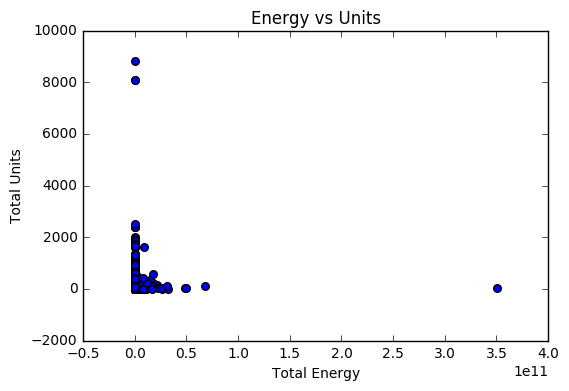

In [19]:
ax = bblnrgdata.plot(kind = "scatter", y="UnitsTotal", x="totnrg", s=30)
ax.set_ylabel("Total Units")
ax.set_xlabel("Total Energy")
ax.set_title("Energy vs Units")

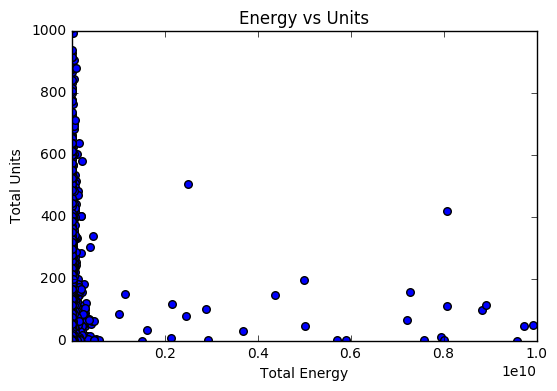

In [20]:
# zoomed in scatter plot
ax = bblnrgdata.plot(kind = "scatter", y="UnitsTotal", x="totnrg", s=30, ylim=(0,1000), xlim=(1e5, 1e10))
ax.set_ylabel("Total Units")
ax.set_xlabel("Total Energy")
ax.set_title("Energy vs Units")

when the points in a plot all look scrunched against the axis 

**Try to make a log plot instead**. In pandas you enable that with the keyword 'loglog' : bblnrgdata.plot(..... loglog=True)

NOTICE THAT YOU WILL STILL HAVE TO CUT YOUR DATASET! in my data I had a lot of energy datapoints that were exactly 0. I removed these "outliers" which I think are truly outliers in the sense that they are misreported numbers. you can remove the data that have nrg==0 (or nrg < some sensible threshold choice) by indexing your array: something like bblnrgdata_cut = bblnrgdata[bblnrgdata.nrg>1000]

Also I removed the buildings with several thousand units. points like that at the edge of my range would have a lot of "LEVERAGE", however they are not suprious entries like the 0, which i believe are missing values, or perhaps abandoned lots. these are good datapoint that i need to throw away functionally for my analysis to work, but that should be stated clearly.



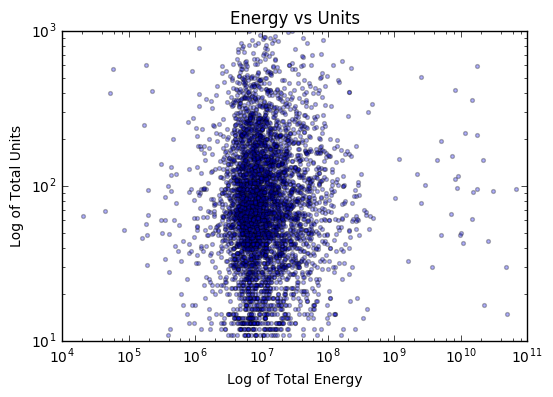

In [21]:
#log plot


bblnrgdata = bblnrgdata[(bblnrgdata.totnrg > 1000) & ( bblnrgdata.UnitsTotal > 10) & ( bblnrgdata.UnitsTotal < 1000)]

ax_eu = bblnrgdata.plot(kind = "scatter", y="UnitsTotal", x="totnrg", c = "b", marker = ".", alpha = 0.3, s=30, 
                     ylim=(1e1, 1e3), xlim=(1e4, 1e11), loglog = True)
ax_eu.set_ylabel("Log of Total Units")
ax_eu.set_xlabel("Log of Total Energy")
ax_eu.set_title("Energy vs Units")


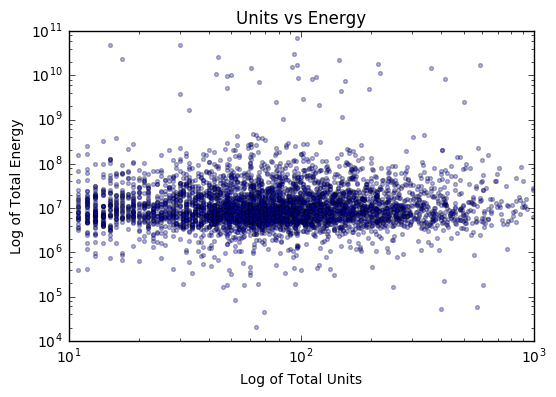

In [22]:
ax_ue = bblnrgdata.plot(kind = "scatter", x="UnitsTotal", y="totnrg", c = "b", marker = ".", alpha = 0.3, s=30, 
                     xlim=(1e1, 1e3), ylim=(1e4, 1e11),loglog = True)
ax_ue.set_xlabel("Log of Total Units")
ax_ue.set_ylabel("Log of Total Energy")
ax_ue.set_title("Units vs Energy")

Now fit a line through the data. you can use whatever you want to do it: statsmodels, scipy, any other package, or write your own minimization of the residuals

## BUT REMEMBER: we see hints of a linear relation in log space! so we want to fit a line to the log of our variables, not the variables themselves:
if you used statsmodels it would look something like this:


In [23]:
# fit a line for Units vs Energy.
import statsmodels.api as sm

X = sm.add_constant(np.log10(bblnrgdata.UnitsTotal))
xfit = sm.add_constant(np.arange(1,3.5,0.1))

lres0 = sm.OLS(np.log10(bblnrgdata.totnrg), X, missing='drop').fit() # ignores entires 
                                                     # where x or y is NaN


In [24]:
#Units vs Energy Chisq test:
error =  np.log10(np.sqrt(bblnrgdata.totnrg))
chisq = ((lres0.predict() - np.log10(bblnrgdata.totnrg))**2 / error**2).sum()

print (" the chisq test score for Units vs Energy is", chisq)


 the chisq test score for Units vs Energy is 86.9330830103


In [25]:
def chisq (model, y, e, dof):
    dof = len(y) - dof - 1
    #print ((model - y)**2, dof)
    return sum(((model - y)**2 / (e**2))  / dof)
chisq(lres0.predict(), np.log10(bblnrgdata.totnrg), error, lres0.df_model)

0.020114086767773508

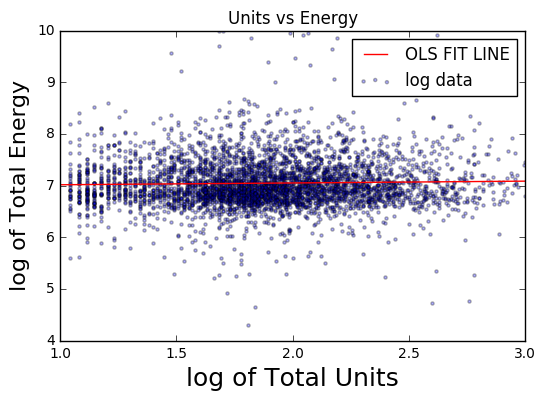

In [26]:

#pl.scatter?
pl.scatter(np.log10(bblnrgdata.UnitsTotal),np.log10(bblnrgdata.totnrg), 
           c = "b", marker = ".", alpha = 0.3, label = "log data")
pl.plot(np.arange(1,3.5,0.1), lres0.predict(xfit), label = "OLS FIT LINE", c = "r")
plt.xlim([1,3])
plt.ylim([4,10])
plt.xlabel('log of Total Units', fontsize=18)
plt.ylabel('log of Total Energy', fontsize=16)
pl.legend()
plt.title("Units vs Energy")
pl.show()




In [27]:

#Fit a line to Energy vs Units
X = sm.add_constant(np.log10(bblnrgdata.totnrg))
xfit = sm.add_constant(np.arange(1,10,0.1))

lres1 = sm.OLS(np.log10(bblnrgdata.UnitsTotal), X, missing='drop').fit()

error =  np.log10(np.sqrt(bblnrgdata.UnitsTotal))
#chisq = ((lres1.predict() - np.log10(bblnrgdata.UnitsTotal))**2 / error**2).sum()

chisq(lres1.predict(),np.log10(bblnrgdata.UnitsTotal), error, lres1.df_model)


0.24502815752187318

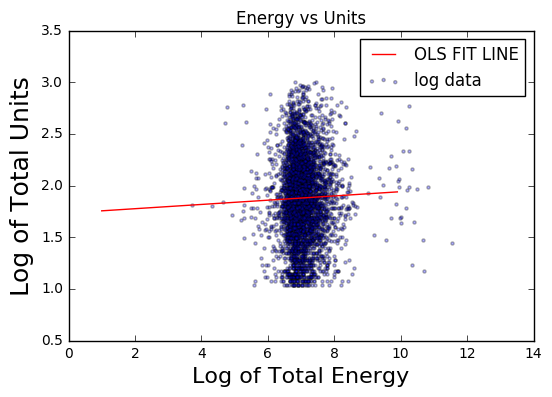

In [28]:
#Fit a line to Energy vs Units

pl.scatter(np.log10(bblnrgdata.totnrg), np.log10(bblnrgdata.UnitsTotal),
           c = "b", marker = ".", alpha = 0.3, label = "log data")

pl.plot(np.arange(1,10,0.1),lres1.predict(xfit),label = "OLS FIT LINE", c = "r")
#plt.ylim(1e1, 1e3)
#plt.xlim(1e4, 1e11)

plt.ylabel('Log of Total Units', fontsize=18)
plt.xlabel('Log of Total Energy', fontsize=16)
pl.legend()
plt.title('Energy vs Units')
pl.show()



## choose wisely which is your DEPENDENT and which is your INDEPENDENT variable. 
both for what you want to do logically (what changes as a functino of what) but also based on which variable has a 'sensible' distribution that allows you to fit a function to it: **you need your independent variable to span a large range, and to be spread somewhat evenly in the range, rather than just clustered in a spot** so in this case switching the independent and dependent variable may be a good idea.



1. **Fit a line** to Units vs Energy.
2. **Fit a line** to Energy vs Units.
3. **Evaluate which is better by calculating the chi square**. I provide a function for that or you can write your own. *Assume poisson statistics for the errors on the independent variable*. 
    The function is 
    
    chisq = $\sum_i \frac{(model(x_i) - data(x_i))^2 }{ error_i^2}$
    
    where the sum is over all datapoints, 
    
    for the i-th value with x value $x_i$ model is the predction of your fit for $x_i$, 
    
    $data(x_i)$ 
    is your observation, 
    
    and $error_i$ is $\sqrt{data(x_i)}$
    (but remember you worked in log space! What are the proper errors??)
    
4. **Fit a 2nd degree polynomial** to the Units vs Energy (with statsmodels.formulae.api.ols() for example passing the formula for a parabola, like we did in class. The formula for a 2nd deg polynomial is 
    $y = ax^2+bx+c$ .

5. **Compare the Units vs Energy line fit and the Units vs Energy 2-nd degree polynomial fit with the Likelihood ratio test**. The formula is:
    
    LR  =  -2 * (logLikelihood_Model1 - logLikelihood_Model2)
    
    where Model1 is the least complex (fewer parameters).
    
    Th logLikelihood can be extracted from the model summary when using statsmodels.
    
    Compare this LR statistics to a chi sq table (for example http://passel.unl.edu/Image/Namuth-CovertDeana956176274/chi-sqaure%20distribution%20table.PNG) and say if *at alpha = 0.05* Model1 is preferible to Model2. The LR is chi^2 distributed with number of degrees of freedom N_{DOF} = parameters_Model2 - parameters_Model1
    
    
    Also if you used statsmodels for the fit you can use the 
    compare_lr_test() method of your fit and verify you got the right answer.  Use the method compare_lr_test() of the most complex model of the 2 and pass it the result of stats models for the simpler fit 
    (e.g. smf.ols(formula = ...).fit().compare_lr_test(sm.OLS(...).fit()))



In [29]:
# fits and plots here 
# Fit a 2nd degree polynomial to the Units vs Energy for a 2nd deg polynomial is y=ax2+bx+c .
import statsmodels.formula.api as smf
poly = pd.DataFrame()
poly["X"] = np.log10(bblnrgdata.UnitsTotal)
poly["Y"] = np.log10(bblnrgdata.totnrg)
poly["X2"] = poly["X"]*poly["X"]
poly.head()


,X,Y,X2
16,1.380211,7.616811,1.904983
45,1.230449,7.254268,1.514005
56,2.404834,7.543541,5.783225
64,1.447158,6.861710,2.094266
65,1.698970,7.629287,2.886499


In [30]:
polyres = smf.ols(formula = 'Y ~ X2 + X ', data=poly).fit()

In [31]:
polyres.summary()
polyres.llf

-3278.4495326299439

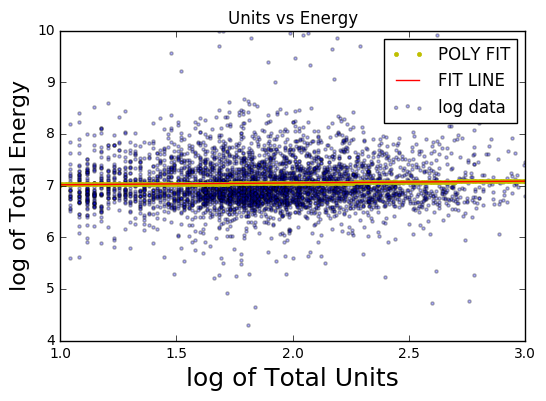

In [32]:
# fits and plots here 
# Fit a 2nd degree polynomial to the Units vs Energy for a 2nd deg polynomial is y=ax2+bx+c .



X = sm.add_constant(np.log10(bblnrgdata.UnitsTotal))
xfit = sm.add_constant(np.arange(1,3.5,0.1))
pl.scatter(np.log10(bblnrgdata.UnitsTotal),np.log10(bblnrgdata.totnrg), 
           c = "b", marker = ".", alpha = 0.3, label = "log data")

p2 = np.poly1d(np.polyfit(np.log10(bblnrgdata.UnitsTotal),np.log10(bblnrgdata.totnrg), 2))
plt.plot(np.arange(1,3.5,0.01), p2(np.arange(1,3.5,0.01)), "y.", label = "POLY FIT",)

pl.plot(np.arange(1,3.5,0.1), lres0.predict(xfit), label = "FIT LINE", c = "r")
plt.xlim([1,3])
plt.ylim([4,10])
plt.xlabel('log of Total Units', fontsize=18)
plt.ylabel('log of Total Energy', fontsize=16)
pl.legend()
plt.title("Units vs Energy")
pl.show()

In [33]:
# my OLS summary. 
# Yours may be somewhat different depending on how you cut the data
lr_stats, p_value, df_diff = polyres.compare_lr_test(lres0)

In [34]:
print ("LR : ", -2 * (lres0.llf - (polyres.llf)))
#print ("LR from statsmodels:", polyres.compare_lr_test(lres0))
lr_stats, p_value, df_diff
#say if at alpha = 0.05 Model1 is preferible to Model2


LR :  0.0378471798431


(0.037847179843083723, 0.84575032524812799, 1.0)

## Since P-value is greater than 0.05, so H0 is not rejected.  The line fit is preferable for my model

## Extra credit 1: calculate and plot the likelihood surface
Create a function that minimizes the residuals:

the residuals are the sum of the differences between data and model: in the case of a line fit model. Use the same function you created for the chi^2 test.

You should sum over each datapoints the residuals squared, which should look something like

(np.log(bblnrgdatacut.nrg) - np.log(bblnrgdatacut.UnitsTotal)*a+b )^2 / errors^2

where a and b are the parameters returned by the line fitter. 

For each data point you can calculate the model at different values : for example in a range B = np.arange (-100, 100, 1) for the intercept, and A = np.arange(-50.0, 50.0, 0.5) for the slope.


You can write it as a nested for loop (or challenge yourself and vectorize it!) with a loop inside another ranging all poissible combinations of the 2 variables (i use enumerate to get both an index from 0 to the size of my array, which i assign to i (and j) and the value of the array at that index - look up the syntax!):


Lsurface = np.zeros((len(A), len(B)))
for i,a in enumerate(A):
    for j,b in enumerate(B):
         Lsurface[i][j] = np.nansum(residuals(a,b,data,errors)) .....

this gives you a 2D array that represents your likelihood surface! What we do to find a good fit is find the minimum (lowest point) on this surface.
You can plot a surface (a 2D array) with pl.imshow(Lsurface) as a "heatmap" but when you do that you will find that the plot is very uninformative. just like you did before with the data, plot the log of it (pl.imshow(np.log(Lsurface)). Also make sure your x and y axes tick numbers represent the range of values, not the cell index, which is the default for imshow. Inputting your data in the cell below should give a plot similar to mine

In [49]:
def resid(a,b):
    #def a line that a is the slope and b is the intercept
    res = ((np.log10(bblnrgdata.totnrg)-(np.log10(bblnrgdata.UnitsTotal)*a)+ b)**2)/(np.log10(bblnrgdata.totnrg)/2)**2
    return res.sum()


In [50]:
slope = np.arange(-50.0, 50.0, 0.5)
intercept = np.arange (-100, 100, 1) 

In [51]:
A = slope
B = intercept
Lsurface = np.zeros((len(A), len(B))) 

In [52]:
Lsurface = np.zeros((len(A), len(B))) 

for i,a in enumerate(A): 
    for j,b in enumerate(B): 
        Lsurface[i][j] = np.nansum(resid(a,b)) 

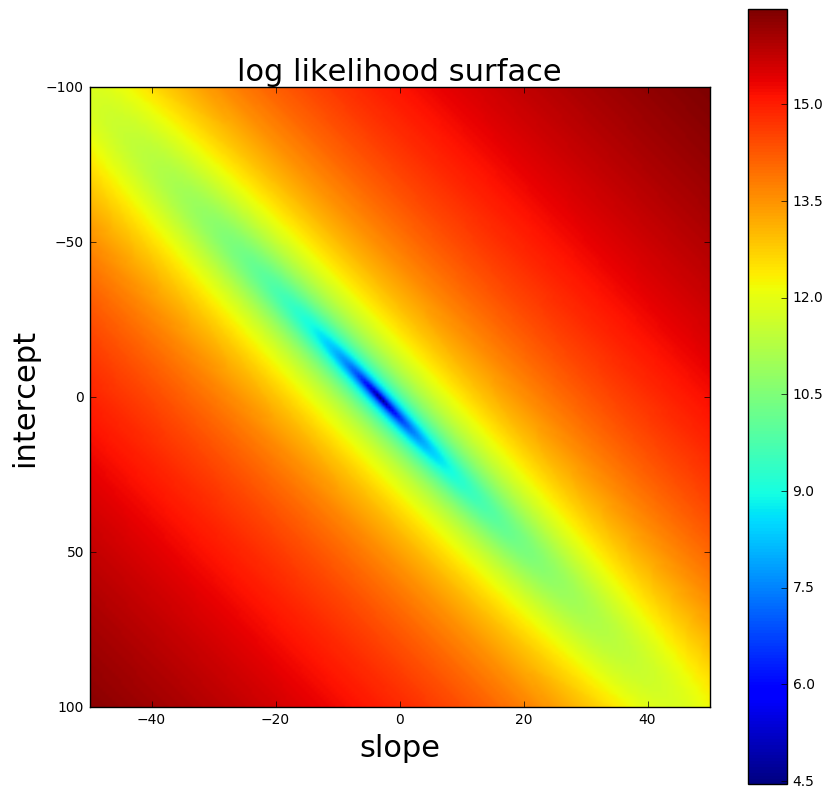

In [53]:
pl.figure(figsize=(10,10))
pl.title ("log likelihood surface", fontsize = 22)
pl.imshow(np.log(Lsurface), extent = [-50,50,100,-100], aspect=0.5)
pl.xlabel('slope', fontsize = 22)
pl.ylabel('intercept', fontsize = 22)
pl.colorbar()

## EXTRA CREDIT: get creative with the dataset. can you make an insigntful plot to show any structure in the data?

below I am mapping the building age to a colormap and the ratio of total to residential units to the size of the datapoint.